In [1]:
import matplotlib.pyplot as plt
import numpy as np

I'm trying to learn how to simulate the three body problem numerically. To do this first, I need to remember how to discretize Newton's EoM

\begin{equation}
    \vec{F} = m\vec{\ddot{r}}
\end{equation}

Instead of solving a 2nd order ODE, we will instead rewrite this equation as two 1st order ODEs

\begin{align}
    \vec{F} &= m\frac{d\vec{v}}{dt}\\
    \vec{v} &= \frac{d\vec{r}}{dt}
\end{align}

Let's attempt to write code for this

### Code for the ODE's

We want to discretize the ODEs, so let's rewrite them to better suit writing them for code

\begin{align}
    v_{i+1} = v_{i} + \frac{F}{m}dt \\
    r_{i+1} = r_i + v_{i}dt
\end{align}

In [2]:
'''
#Set up the initial conditions and time steps
r0 = 0
v0 = 0
F = 2
m = 10
dt = 0.1


for i in range(0,100):
    vf = v0 + (F/m) * dt
    rf = r0 + v0 * dt

    v0 = vf
    r0 = rf

'''



'\n#Set up the initial conditions and time steps\nr0 = 0\nv0 = 0\nF = 2\nm = 10\ndt = 0.1\n\n\nfor i in range(0,100):\n    vf = v0 + (F/m) * dt\n    rf = r0 + v0 * dt\n\n    v0 = vf\n    r0 = rf\n\n'

We now want to try a simple example code. Let's launch a Projectile in the air.

### Launch a projectile!

To do this, we only need to change the F/m to a -9.8 m/s^2 in the Euler method

In [3]:
#Set up the initial conditions and time steps
n = 10
dt = 1/n

x = np.empty([n+1])
y = np.empty([n+1])
vx = np.empty([n+1])
vy = np.empty([n+1])
t = np.empty([n+1])

x[0] = 0
y[0] = 0
vx[0] = 2
vy[0] = 3
t[0] = 0

for i in range(0,n):

    t[i+1] = t[i] + dt

    #x direction
    vx[i+1] = vx[i]
    x[i+1] = x[i] + vx[i] * dt

    #y direction
    vy[i+1] = vy[i] - 9.8 * dt
    y[i+1] = y[i] + vy[i] * dt


print(x)
print(y)
print(t)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
[ 0.     0.3    0.502  0.606  0.612  0.52   0.33   0.042 -0.344 -0.828
 -1.41 ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


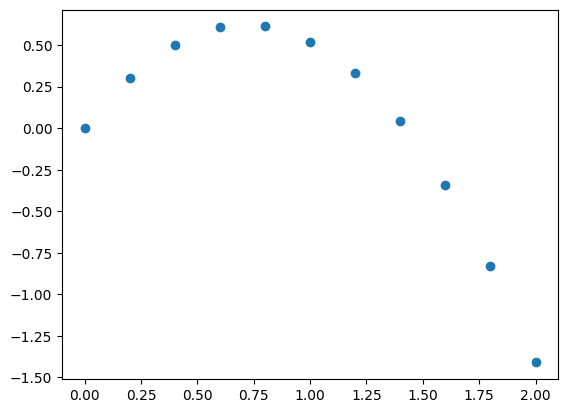

In [4]:
plt.scatter(x,y)
plt.show()